In [1]:
import re
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [64]:
#---Custom Lemmatizer takes a df and adds lemmatized column

def custom_lemmatize(df):
    
  
    
    #instantiate Lemmatizer and new dictionary to house altered posts
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = None
    
    for i in range(0,len(df['selftext'])):
        
        #setting up post and list of stopwords
        post = df['selftext'][i]
        post = post.lower()
        stops = stopwords.words('english')

        #stripping the post of non-letters and frequently occuring TLDR; expression ('too long don't read)
        exclusion_list = ['[^a-zA-Z]', 'tldr', 'tl;dr', 'http', '.com', 'www']
        exclusions = '|'.join(exclusion_list)
        post = re.sub(exclusions, ' ' , post)
        
        #---Lemmatizing words, preserving stopwords for transformer to handle
        words = [lemmatizer.lemmatize(word) for word in post.split() if word not in stops]
        
        #---Adding lemmatized post to dictionary
        df['lemmatized'][i] = ' '.join(words)
        
#---CountVectorizes and pulls feature importances for given ngram range

def plot_ngrams(df, ngrams, amount):
    
    '''
    Takes in a df of posts and plots the highest occuring given ngram range
    
    ARGS:
    
        df: dataframe
        ngrams (tuple): ngram range desired
        amount (int): number of highest occuring ngrams desired
        
    
    '''

    #---CountVectorizing words to get importances
    cvect = CountVectorizer(stop_words='english', ngram_range=ngrams, max_features=500)
    counts = cvect.fit_transform(df['lemmatized'])
    
    df_cvect = pd.DataFrame(counts.toarray(), columns = cvect.get_feature_names())
    
    df_cvect.sum().sort_values(ascending=False).head(amount).plot(kind='barh');
            

In [3]:
df_retail = pd.read_csv('./data/retail_text.csv', index_col=0)
df_server = pd.read_csv('./data/server_text.csv', index_col=0)

# EDA/VIZ

# Retail

In [4]:
df_retail.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,og_description,og_title,thumbnail_height,thumbnail_width,author_created_utc,category,content_categories,media_embed,removal_reason,secure_media_embed
3,[],False,Former_Trainer6705,NaN,[],NaN,text,t2_8s6ku8nz,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,[],False,AutoModerator,standard,[],"Sir, You're Making A Scene",text,t2_6l4z3,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,[],False,ArtilleryOopsie,NaN,[],NaN,text,t2_94mfavl5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,[],False,ArtilleryOopsie,NaN,[],NaN,text,t2_94mfavl5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,[],False,ArtilleryOopsie,NaN,[],NaN,text,t2_94mfavl5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#df_retail.info()
df_retail['created_utc'].sort_values() #---Oldest post collected from Nov 17, 2018

19996    1542514144
19992    1542517311
19991    1542523194
19990    1542526519
19988    1542537646
            ...    
47       1610767411
46       1610769591
29       1610850937
14       1610982012
3        1611086908
Name: created_utc, Length: 8968, dtype: int64

In [6]:
#---Looking through df for columns that could aid in cleaning

df_retail.iloc[:5, 20:40]
df_retail.iloc[:5, 40:60]
df_retail.iloc[:5, 60:80]
df_retail.iloc[:5, 80:]

,thumbnail_height,thumbnail_width,author_created_utc,category,content_categories,media_embed,removal_reason,secure_media_embed
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#---Author Value Counts

df_retail['author'].value_counts(ascending=False)

AutoModerator       109
SlytherinAhri        34
Writer4God           34
xmarketladyx         32
crispysilicon        26
                   ... 
Moose1194             1
oceanofdrops          1
furupower             1
Not_That_Magical      1
Cursed_Angel_         1
Name: author, Length: 6189, dtype: int64

In [8]:
#---Looking for duplicates from AutoModerator
df_retail.loc[df_retail['author'] == 'AutoModerator'].head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,og_description,og_title,thumbnail_height,thumbnail_width,author_created_utc,category,content_categories,media_embed,removal_reason,secure_media_embed
14,[],False,AutoModerator,standard,[],"Sir, You're Making A Scene",text,t2_6l4z3,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,[],False,AutoModerator,standard,[],"Sir, You're Making A Scene",text,t2_6l4z3,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,[],False,AutoModerator,standard,[],"Sir, You're Making A Scene",text,t2_6l4z3,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,[],False,AutoModerator,standard,[],"Sir, You're Making A Scene",text,t2_6l4z3,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,[],False,AutoModerator,standard,[],"Sir, You're Making A Scene",text,t2_6l4z3,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_retail = df_retail.loc[df_retail['author'] != 'AutoModerator']


In [10]:
#---Checking for more users. Steep drop off in post counts. 

df_retail['author'].value_counts(ascending=False).head(10)

SlytherinAhri       34
Writer4God          34
xmarketladyx        32
crispysilicon       26
TorroesPrime        25
Baileythenerd       24
ComputerGeek1100    23
TylPlas26           21
RealestAC           21
Alexandraisamazi    20
Name: author, dtype: int64

In [11]:
#---There are about ~40 duplicates out of 8800...

len(list(df_retail['selftext'].unique())) #-8816
len(df_retail['selftext'])#-8859

8859

In [12]:
#---Dropping Duplicate posts

df_retail.drop_duplicates(subset='selftext', inplace=True)
df_retail.reset_index(drop=True, inplace=True)

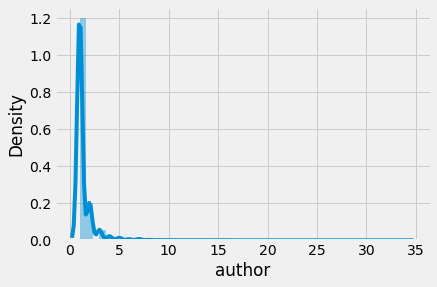

In [13]:
#---Confirming no strange outliers

sns.distplot(df_retail['author'].value_counts());

In [14]:
#---Make a lematized column for Retail posts, 

custom_lemmatize(df_retail)

Text(0.5, 1.0, 'Most Frequent Retail words')

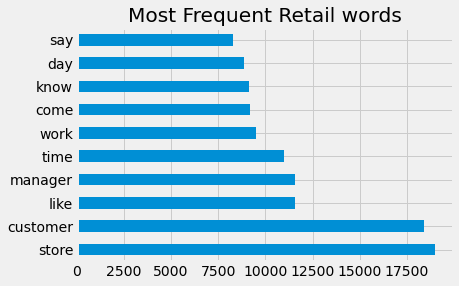

In [15]:
plt.Figure(figsize=(12, 12))

plot_ngrams(df_retail, (1,1), 10)
plt.title("Most Frequent Retail words")

Text(0.5, 1.0, 'Most Frequent Retail bigrams')

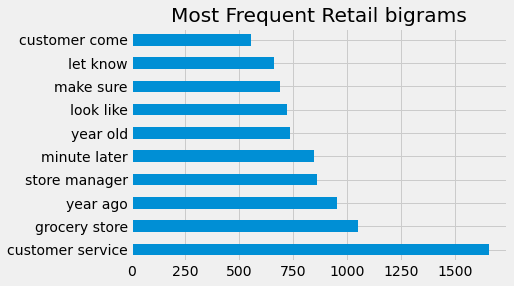

In [16]:
plt.Figure(figsize=(12, 12))

plot_ngrams(df_retail, (2,2), 10)
plt.title('Most Frequent Retail bigrams')

Text(0.5, 1.0, 'Most Frequent Retail trigrams')

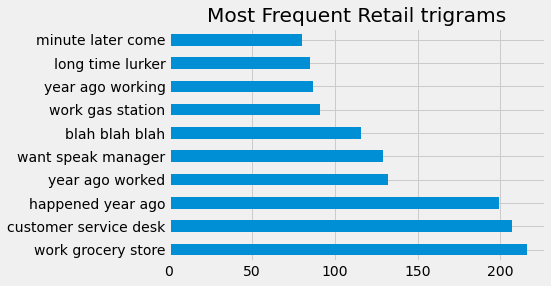

In [17]:
plt.Figure(figsize=(12, 12))

plot_ngrams(df_retail, (3,3), 10)
plt.title('Most Frequent Retail trigrams')

In [18]:
#df_retail.loc[df_retail['selftext'].str.contains()]

# Server

In [19]:
df_server.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,link_flair_template_id,media,media_embed,secure_media,secure_media_embed,steward_reports,removed_by,updated_utc,og_description,og_title
0,[],False,endorrawitch,NaN,[],NaN,text,t2_p4jajgd,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,mindaq,NaN,[],NaN,text,t2_92ec3,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,sedtobeindecentshape,NaN,[],NaN,text,t2_1fomyrki,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Prize_Dog,NaN,[],NaN,text,t2_7wxcgecj,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,MamaB1612,NaN,[],NaN,text,t2_2w3exnb7,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_server['created_utc'].sort_values() #---Oldest post collected from Jun 22, 2019

11999    1561239771
11998    1561243860
11997    1561246095
11996    1561248344
11995    1561249375
            ...    
4        1611026246
3        1611030376
2        1611036436
1        1611083779
0        1611088257
Name: created_utc, Length: 10505, dtype: int64

In [21]:
df_server['author'].value_counts(ascending = False).head(10)

OsamaBenLadle    73
JRman99          40
JudithGG         34
alozcast         33
screamtastic     29
PurplePain57     28
GeneralSalty1    27
pavioc16         27
shicole3         25
fallinaditch     23
Name: author, dtype: int64

In [22]:
df_server.loc[df_server['author'] == 'OsamaBenLadle']['selftext']

40       I need to rant for a moment. I start school ne...
88       I served a table of a 100+ tab for over an hou...
95       We’ve all had those regulars who just go to th...
142      If you stay for more than two hours after you’...
168      The Dream Team worked yesterday morning. The b...
                               ...                        
10005    I’m sure we all have regulars at our respectiv...
10033    So, this did not happen to me, but to another ...
10201    At the small, pizza restaurant I serve at, we ...
10204    Quick post, but I’m just going to tell you one...
10611    My longest job was working at a popular, local...
Name: selftext, Length: 73, dtype: object

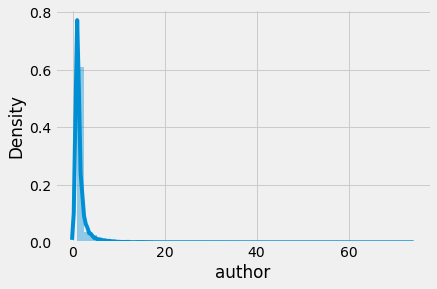

In [23]:
sns.distplot(df_server['author'].value_counts());

In [24]:
#--- Dropping ~30 Duplicates

len(df_server['selftext'].unique()) #-10476
len(df_server['selftext'])#-10505

df_server.drop_duplicates(subset=['selftext'], inplace=True)
df_server.reset_index(drop=True, inplace=True)

In [25]:
custom_lemmatize(df_server)

In [26]:
df_server.loc[df_server['lemmatized'].isna()]['selftext']

Series([], Name: selftext, dtype: object)

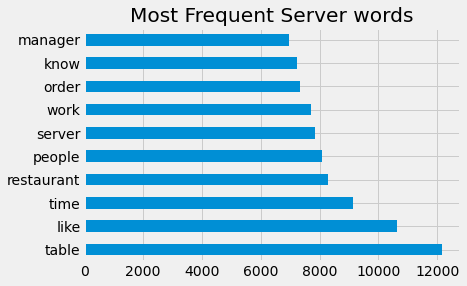

In [27]:
plt.Figure(figsize=(12, 12))

plot_ngrams(df_server, (1,1), 10)
plt.title('Most Frequent Server words');

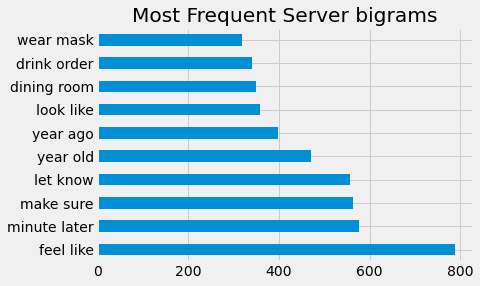

In [28]:
plt.Figure(figsize=(12, 12))

plot_ngrams(df_server, (2, 2), 10)
plt.title('Most Frequent Server bigrams');

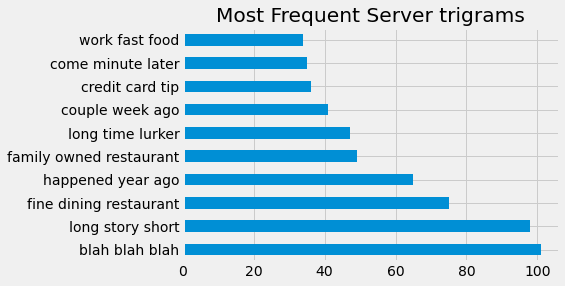

In [29]:
plt.Figure(figsize=(12, 12))

plot_ngrams(df_server, (3, 3), 10)
plt.title('Most Frequent Server trigrams');

# Combining posts

In [30]:
df_retail_posts = df_retail[['selftext', 'title', 'author', 'created_utc', 'subreddit', 'lemmatized']]
df_server_posts = df_server[['selftext', 'title', 'author', 'created_utc', 'subreddit', 'lemmatized']]

In [31]:
df_full = pd.concat([df_retail_posts, df_server_posts])
df_full.head()
df_full.tail()

,selftext,title,author,created_utc,subreddit,lemmatized
10471,"Yes, I am a regular dine and dasher (around 70...",Why do servers go out of there way to try and ...,AlexeyShved,1561249375,TalesFromYourServer,yes regular dine dasher around sit meal feel l...
10472,THIS IS A LONG POST SORRY \n\n\nI'm going to ...,Am I the Asshole?,lafawnduh,1561248344,TalesFromYourServer,long post sorry going try write objective way ...
10473,"This happens all the time.\nEnter: me, coming ...",I'll be right back with the rest,weewoo18,1561246095,TalesFromYourServer,happens time enter coming much food carry righ...
10474,I work as a hostess/cocktail waitress at an up...,When is it ok to stand up to a rude customer a...,itsjbuttz,1561243860,TalesFromYourServer,work hostess cocktail waitress upscale restaur...
10475,"If you're going to ask for specials, please sp...",Specials,Zilvercreeper67,1561239771,TalesFromYourServer,going ask special please specify want use spec...


In [32]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19292 entries, 0 to 10475
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   selftext     19292 non-null  object
 1   title        19292 non-null  object
 2   author       19292 non-null  object
 3   created_utc  19292 non-null  int64 
 4   subreddit    19292 non-null  object
 5   lemmatized   19292 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


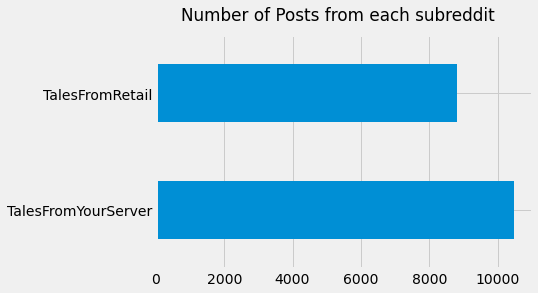

In [33]:
df_full['subreddit'].value_counts().plot(kind='barh')
plt.suptitle('Number of Posts from each subreddit');

In [34]:
word_counts = [len(post.split()) for post in list(df_full['selftext'])]

In [35]:
df_full['wc'] = word_counts

In [36]:
df_full.loc[df_full['subreddit'] == 'TalesFromRetail']['wc'].describe()

count    8816.000000
mean      419.002722
std       288.801583
min         1.000000
25%       227.000000
50%       344.000000
75%       530.000000
max      4452.000000
Name: wc, dtype: float64

In [37]:
df_full.loc[df_full['subreddit'] == 'TalesFromYourServer']['wc'].describe()

count    10476.000000
mean       261.391466
std        247.506872
min          1.000000
25%         92.000000
50%        193.000000
75%        351.000000
max       3243.000000
Name: wc, dtype: float64

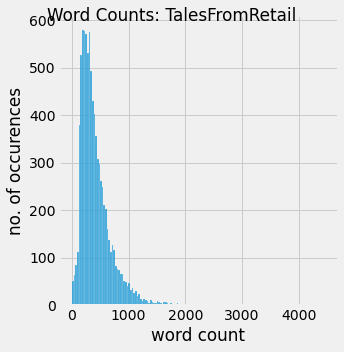

In [38]:
sns.displot(df_full.loc[df_full['subreddit'] == 'TalesFromRetail']['wc'])
plt.xlabel('word count')
plt.ylabel('no. of occurences')
plt.suptitle('Word Counts: TalesFromRetail');

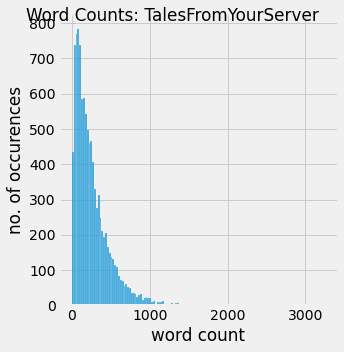

In [39]:
sns.displot(df_full.loc[df_full['subreddit'] == 'TalesFromYourServer']['wc'])
plt.xlabel('word count')
plt.ylabel('no. of occurences')
plt.suptitle('Word Counts: TalesFromYourServer');

In [40]:
#--Extreme long posts

df_full[df_full['wc'] > 2000]

,selftext,title,author,created_utc,subreddit,lemmatized,wc
2467,Hi! This is my first post ever. I'm not a writ...,Can never do anything right,stompy22,1576292346,TalesFromRetail,hi first post ever writer need share ever sinc...,2072
4098,I was hired at a grocery store little over a m...,I watched a couple of dumb teens drive off int...,sweetcarolineisme,1565764353,TalesFromRetail,hired grocery store little month ago courtesy ...,2094
4104,I was hired at a grocery store little over a m...,I watched a couple of dumb teens drive off int...,sweetcarolineisme,1565737554,TalesFromRetail,hired grocery store little month ago courtesy ...,2110
4336,\[This is a bit dark and karma inducing but it...,My history in working in a inventory company (...,JetBlackScarab,1564551268,TalesFromRetail,bit dark karma inducing something felt worth y...,2185
4631,I guess I'm not certain how well a car dealers...,Tales from the Dealership,Left4DayZ1,1563118841,TalesFromRetail,guess certain well car dealership fit spirit s...,3552
5136,Here is my first post. Not quite sure if this ...,A couple short stories that made one big hells...,leo_in_wonderland,1560763681,TalesFromRetail,first post quite sure go one rule guess find g...,2784
5185,"Alrighty, this is going to be a long one, so b...",Two nightmare customers result in an awful tim...,mindlessharmony1017,1560478634,TalesFromRetail,alrighty going long one buckle sorry bottom si...,2819
5459,I have posted this on the Entitledparents subr...,Entitled mother and daughter get blacklisted.,arcalici,1559145929,TalesFromRetail,posted entitledparents subreddit told also sha...,2239
5580,"\n\nHey guys! So, I’ve been a frequent lurke...",Screw with me and I'll make half of your team ...,Enimia,1558561330,TalesFromRetail,hey guy frequent lurker subreddit read crazy s...,2696
5582,"Hey guys! So, I’ve been a frequent lurker on t...",Screw with me and I'll make half of your team ...,Enimia,1558560313,TalesFromRetail,hey guy frequent lurker subreddit read crazy s...,2728


In [41]:
# found duplicates in above at rows: 4098 5580 

df_full.drop(index=[4098, 5580], inplace=True)
df_full.reset_index(drop=True, inplace=True)

In [42]:
df_full.loc[df_full['wc'] > 2000]['selftext']

2467     Hi! This is my first post ever. I'm not a writ...
4103     I was hired at a grocery store little over a m...
4335     \[This is a bit dark and karma inducing but it...
4630     I guess I'm not certain how well a car dealers...
5135     Here is my first post. Not quite sure if this ...
5184     Alrighty, this is going to be a long one, so b...
5458     I have posted this on the Entitledparents subr...
5580     Hey guys! So, I’ve been a frequent lurker on t...
6284     TL;DR at the bottom. :D \n\nHey everyone! I’m ...
6800     This is my first post ever to Reddit. I joined...
6927     THIS IS A LONG ONE AND THERE IS NO TL:DR, BECA...
7030     Hey there everyone. First-time poster here!\n\...
7428     Hello everyone!\n\nIt's my second time posting...
8154     I worked in retail for 37 years. Now that I’m ...
8534     Mobile, formatting, first post, blah blah blah...
8963     I saw a couple of posts about allergy sufferer...
9154     I have a story for you all. It happened to me .

In [43]:
df_full.to_csv('./data/clean_posts.csv')

# Covid Exploration

In [44]:
df_full.loc[df_full['lemmatized'].str.contains('mask')]['subreddit'].value_counts()
                                                                                                        

TalesFromYourServer    599
TalesFromRetail         65
Name: subreddit, dtype: int64

cdc mask guidance first: 1585922400   https://en.wikipedia.org/wiki/Face_masks_during_the_COVID-19_pandemic_in_the_United_States

march 1st restaurant: 1583074800

In [91]:
df_pre_covid = df_full.loc[df_full['created_utc'] < 1583074800]
df_covid = df_full.loc[df_full['created_utc'] > 1583074800]

df_pre_covid.reset_index(drop=True, inplace=True)
df_covid.reset_index(drop=True, inplace=True)

custom_lemmatize(df_covid)
custom_lemmatize(df_pre_covid)

df_pre_covid.to_csv('./data/pre_covid.csv')
df_covid.to_csv('./data/covid.csv')



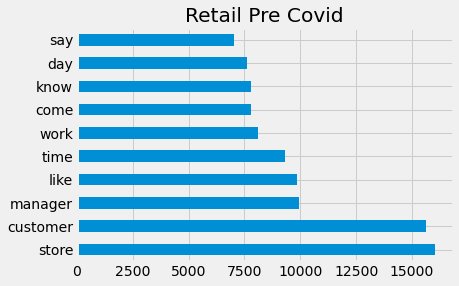

In [74]:
plt.Figure(figsize=(10, 10))
plt.title('Retail Pre Covid')
plot_ngrams(df_pre_covid[df_pre_covid['subreddit'] == 'TalesFromRetail'], (1,1), 10)

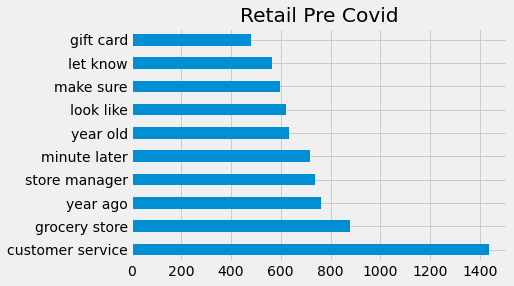

In [75]:
plt.Figure(figsize=(10, 10))
plt.title('Retail Pre Covid')

plot_ngrams(df_pre_covid[df_pre_covid['subreddit'] == 'TalesFromRetail'], (2,2), 10)

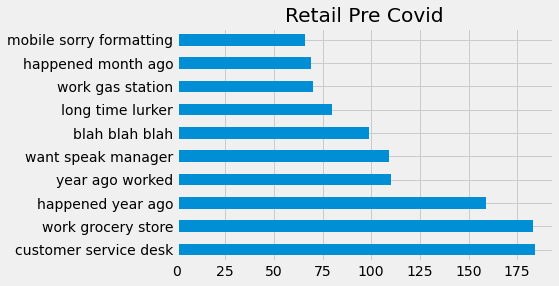

In [76]:
plt.Figure(figsize=(10, 10))
plt.title('Retail Pre Covid')

plot_ngrams(df_pre_covid[df_pre_covid['subreddit'] == 'TalesFromRetail'], (3,3), 10)

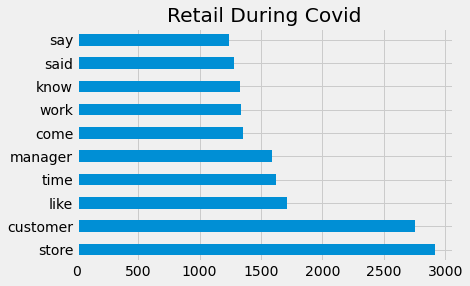

In [80]:
plt.Figure(figsize=(10, 10))
plt.title('Retail During Covid')
plot_ngrams(df_covid[df_covid['subreddit'] == 'TalesFromRetail'], (1,1), 10)

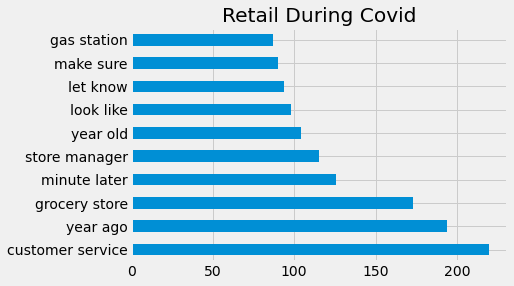

In [81]:
plt.Figure(figsize=(10, 10))
plt.title('Retail During Covid')
plot_ngrams(df_covid[df_covid['subreddit'] == 'TalesFromRetail'], (2,2), 10)

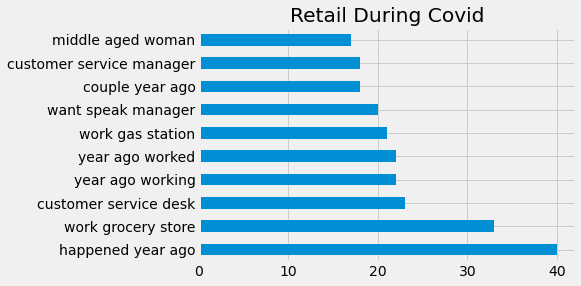

In [82]:
plt.Figure(figsize=(10, 10))
plt.title('Retail During Covid')
plot_ngrams(df_covid[df_covid['subreddit'] == 'TalesFromRetail'], (3,3), 10)

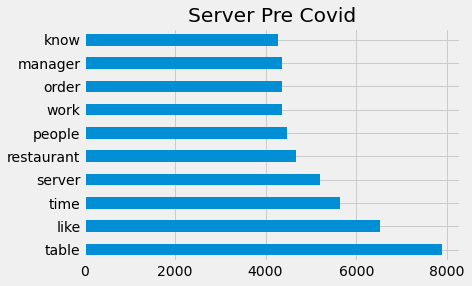

In [86]:
plt.Figure(figsize=(10, 10))
plt.title('Server Pre Covid')
plot_ngrams(df_pre_covid[df_pre_covid['subreddit'] == 'TalesFromYourServer'], (1,1), 10)

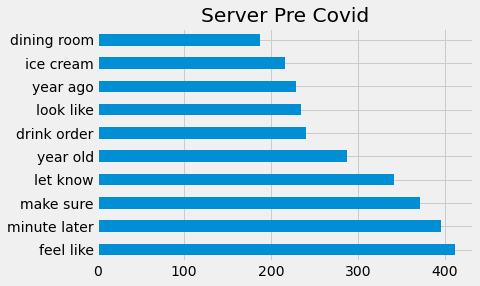

In [87]:
plt.Figure(figsize=(10, 10))
plt.title('Server Pre Covid')
plot_ngrams(df_pre_covid[df_pre_covid['subreddit'] == 'TalesFromYourServer'], (2,2), 10)

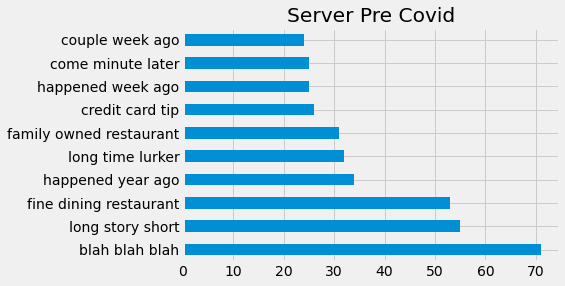

In [88]:
plt.Figure(figsize=(10, 10))
plt.title('Server Pre Covid')

plot_ngrams(df_pre_covid[df_pre_covid['subreddit'] == 'TalesFromYourServer'], (3,3), 10)

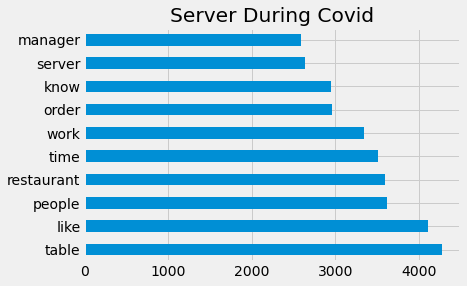

In [83]:
plt.Figure(figsize=(10, 10))
plt.title('Server During Covid')
plot_ngrams(df_covid[df_covid['subreddit'] == 'TalesFromYourServer'], (1,1), 10)

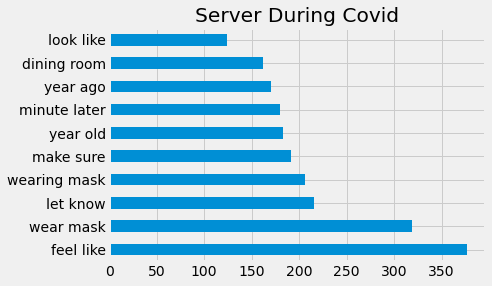

In [84]:
plt.Figure(figsize=(10, 10))
plt.title('Server During Covid')
plot_ngrams(df_covid[df_covid['subreddit'] == 'TalesFromYourServer'], (2,2), 10)

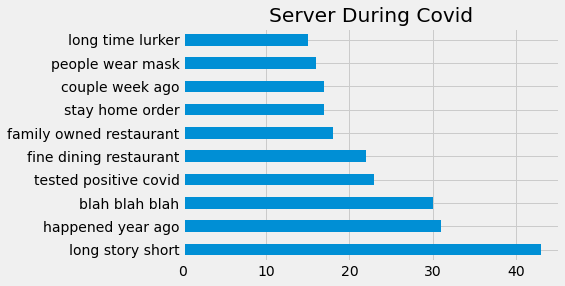

In [85]:
plt.Figure(figsize=(10, 10))
plt.title('Server During Covid')

plot_ngrams(df_covid[df_covid['subreddit'] == 'TalesFromYourServer'], (3,3), 10)